## Exercise 4 : Double Conditional Graph

In [6]:
from typing import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1: int 
    operation: str
    number2: int
    finalNumber: int
    number3: int
    operation2: str
    number4: int
    finalNumber2: int

In [14]:
def Adder(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    print("adder")
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def Subtractor(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    print("subtractor")
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def Router(state:AgentState) -> AgentState:
    """This node will select the next phase"""
    if state["operation"] == "+":
        return "addition"
    
    elif state["operation"] == "-":
        print("SUB 1")
        return "subtraction"   


def Adder2(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    print("adder1")
    state["finalNumber2"] = state["number3"] + state["number4"]
    print(state["finalNumber2"])

    return state

def Subtractor2(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    print("subtractor1")
    state["finalNumber2"] = state["number3"] - state["number4"]
    print(state["finalNumber2"])
    return state

def Router2(state:AgentState) -> AgentState:
    """This node will select the next phase"""
    if state["operation2"] == "+":
        print("ADD1")
        return "addition2"
    
    elif state["operation2"] == "-":
        return "subtraction2"   


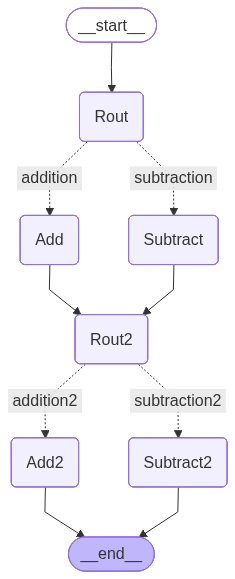

In [15]:
graph = StateGraph(AgentState)

graph.add_node("Add", adder)
graph.add_node("Subtract", subtractor)
graph.add_node("Rout", lambda state:state) 

graph.add_node("Add2", adder2)
graph.add_node("Subtract2", subtractor2)
graph.add_node("Rout2", lambda state:state) 


graph.add_edge(START, "Rout")

graph.add_conditional_edges(
    "Rout", 
    Router,
    {
        # Edge: Node 
        "addition": "Add",
        "subtraction": "Subtract"
    }
)


graph.add_edge("Add", "Rout2")
graph.add_edge("Subtract", "Rout2")

graph.add_conditional_edges(
    "Rout2", 
    Router2,
    {
        # Edge: Node format
        "addition2": "Add2",
        "subtraction2": "Subtract2"
    }
)


graph.add_edge("Add2", END)
graph.add_edge("Subtract2", END)

app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
initial_state = AgentState(number1 = 10, operation="-", number2 = 5, number3 = 7, number4=2, operation2="+", finalNumber= 0, finalNumber2 = 0)
print(app.invoke(initial_state))

SUB 1
subtractor
ADD1
adder1
9
{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5, 'number3': 7, 'operation2': '+', 'number4': 2, 'finalNumber2': 9}
